## Importing Libraries

In [83]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Image Pre-processing

In [84]:
img = cv2.imread('./test_images/group.jpg')
img.shape

(3024, 4032, 3)

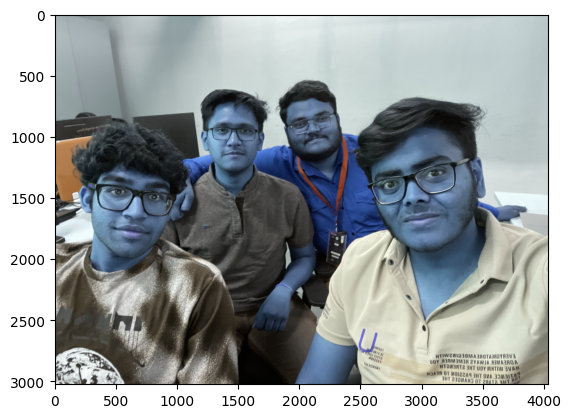

In [85]:
plt.imshow(img)

In [86]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3024, 4032)

In [87]:
gray

array([[173, 178, 180, ..., 200, 198, 196],
       [172, 176, 178, ..., 196, 198, 199],
       [172, 174, 176, ..., 194, 196, 199],
       ...,
       [244, 248, 251, ..., 145, 143, 140],
       [248, 250, 253, ..., 145, 144, 142],
       [246, 250, 252, ..., 143, 144, 144]], dtype=uint8)

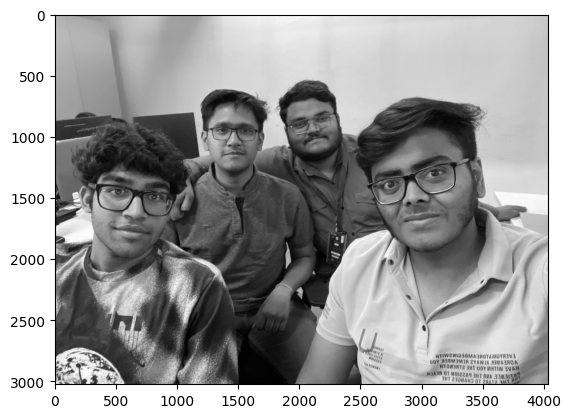

In [88]:
plt.imshow(gray, cmap='gray')

In [89]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1219,  761,  495,  495],
       [1879,  685,  464,  464],
       [ 952, 1568,   64,   64]])

In [90]:
(x,y,w,h) = faces[0]
x,y,w,h

(1219, 761, 495, 495)

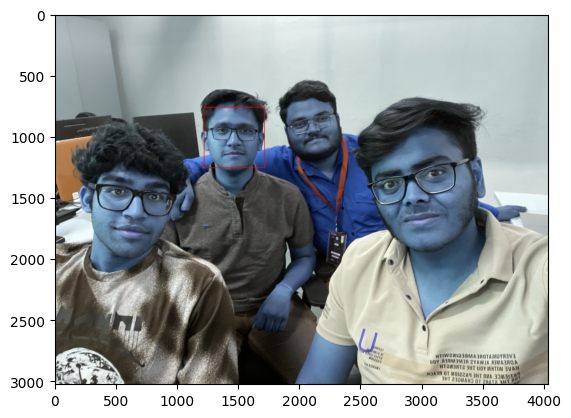

In [91]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

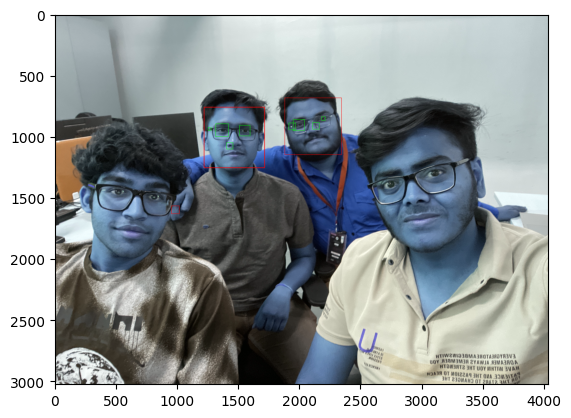

In [92]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### Croping Final image

In [ ]:
count = 0  # Counter for naming the cropped image files
for (x, y, w, h) in faces:  # Adjust based on whether you used Dlib or MTCNN
    roi_color = img[y:y+h, x:x+w]

    cv2.imwrite(f"face_{count}.jpg", roi_color)
    count += 1

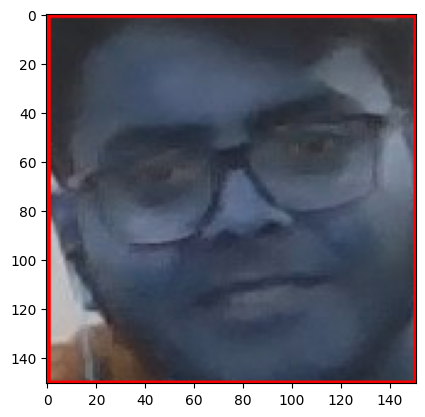

In [76]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [77]:
cropped_img = np.array(roi_color)
cropped_img.shape

(151, 151, 3)

### Wavelet transform

In [79]:
# Getting various facial features such as eyes, nose, lips etc using "Wavelet transform"
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

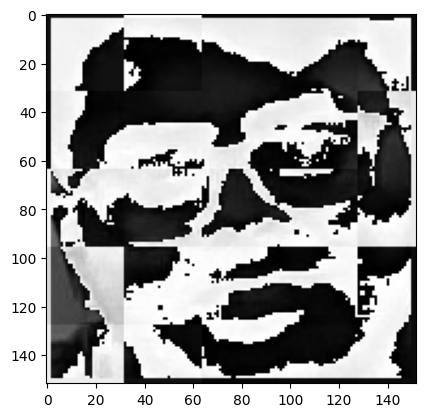

In [80]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

## Saving final croped image

In [81]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 1:
            return roi_color

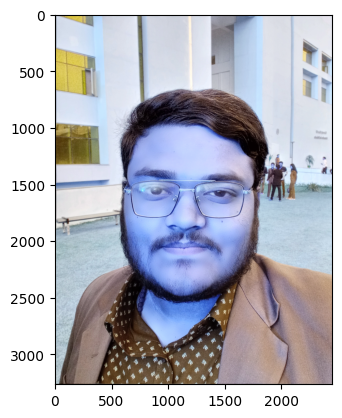

In [82]:
original_image = cv2.imread('./test_images/naveen1.jpg')
plt.imshow(original_image)

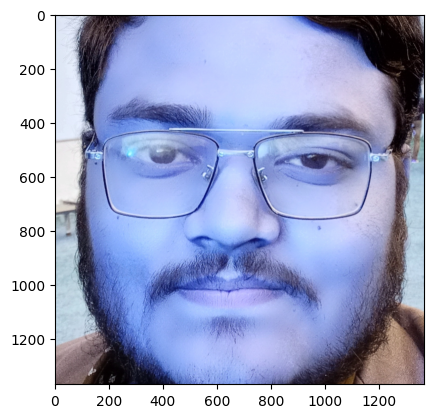

In [37]:
cropped_image = get_cropped_image('./test_images/naveen1.jpg')
plt.imshow(cropped_image)

### Testing on unclear data

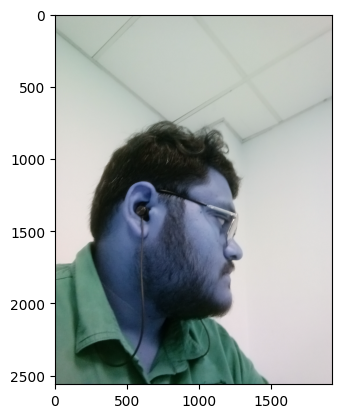

In [38]:
org_unclear_image = cv2.imread('./test_images/naveen2.jpg')
plt.imshow(org_unclear_image)

In [39]:
unclear_cropped_image = get_cropped_image('./test_images/naveen2.jpg')
unclear_cropped_image

## Saving Cropped Image to new dir

In [40]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/CROPPED/"

In [41]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [42]:
img_dirs

['./Dataset/aditya_rawat',
 './Dataset/chaitanya_gupta',
 './Dataset/naveen_sharma',
 './Dataset/yash_gupta']

In [43]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [44]:
cropped_image_dirs = []
person_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    person_file_names_dict[person_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + person_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./Dataset/CROPPED/aditya_rawat
Generating cropped images in folder:  ./Dataset/CROPPED/chaitanya_gupta
Generating cropped images in folder:  ./Dataset/CROPPED/naveen_sharma
Generating cropped images in folder:  ./Dataset/CROPPED/yash_gupta


In [45]:
class_dict = {}
count = 0
for person_name in person_file_names_dict.keys():
    class_dict[person_name] = count
    count = count + 1
class_dict

{'aditya_rawat': 0, 'chaitanya_gupta': 1, 'naveen_sharma': 2, 'yash_gupta': 3}

### Splitting of Dataset

In [46]:
X, y = [], []
for person_name, training_files in person_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[person_name])

In [47]:
len(X[0])

4096

In [48]:
X[0]

array([[103],
       [143],
       [183],
       ...,
       [  0],
       [252],
       [  0]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(265, 4096)

## Model Training

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9104477611940298

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.96      0.92      0.94        25
           2       0.82      0.95      0.88        19
           3       1.00      0.62      0.77         8

    accuracy                           0.91        67
   macro avg       0.93      0.87      0.89        67
weighted avg       0.92      0.91      0.91        67



In [54]:
# Finding best model using grid search
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.979615,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.954359,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.944231,{'logisticregression__C': 1}


In [57]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [58]:
best_estimators['svm'].score(X_test,y_test)

0.9402985074626866

In [59]:
best_estimators['random_forest'].score(X_test,y_test)

0.9104477611940298

In [60]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9402985074626866

In [61]:
best_clf = best_estimators['svm']

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  0,  0,  0],
       [ 0, 23,  2,  0],
       [ 1,  0, 18,  0],
       [ 1,  0,  0,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

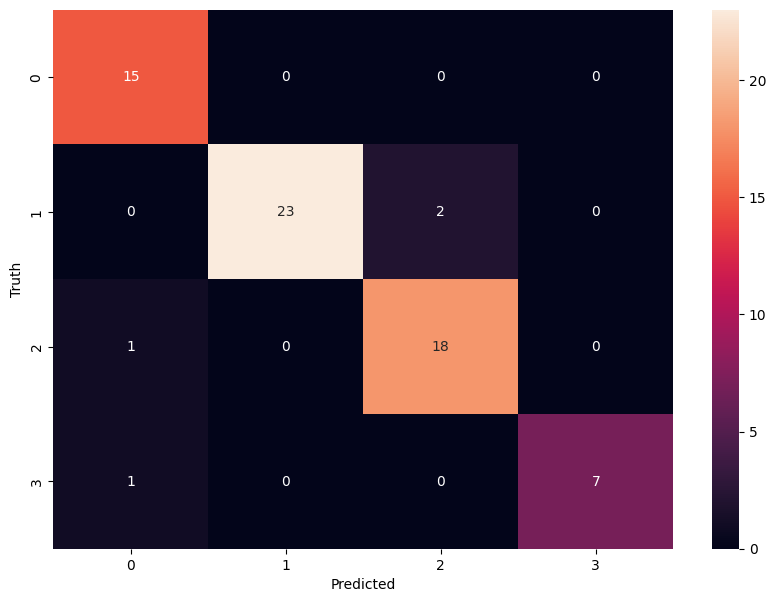

In [63]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Saving the Model

In [64]:
class_dict

{'aditya_rawat': 0, 'chaitanya_gupta': 1, 'naveen_sharma': 2, 'yash_gupta': 3}

In [65]:
import pickle
# Save the model as a pickle in a file 
pickle.dump(best_clf, open("model.pkl", "wb"))

In [66]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))